In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from psyrun.store import AutodetectStore
store = AutodetectStore()

In [3]:
from cue.analysis.conversion import DataRep
from cue.analysis import evaluation as ev
from cue.analysis.io import read_exp_data
from cue.protocols import PROTOCOLS

In [4]:
from cue.utils.plotting import *

In [5]:
style()

## Serial

In [6]:
proto = PROTOCOLS['serial']
exp_data = read_exp_data(proto.exp_data)
model_data = DataRep('psyrun', store.load('../../data/serial-inc-noise.npz'))

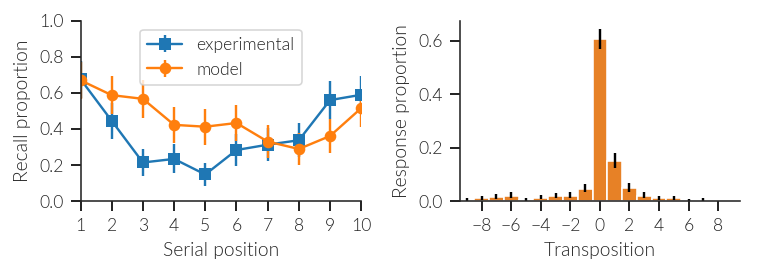

In [7]:
fig = plt.figure(figsize=(textwidth, 0.9 * row_height))
ax = fig.add_subplot(1, 2, 1)
ev.evaluate_serial_pos_curve(proto, exp_data, model_data, ax=ax)
ax.legend(loc='upper center')
ev.evaluate_transpositions(proto, exp_data, model_data, ax=fig.add_subplot(1, 2, 2))
sns.despine(fig)
fig.tight_layout()

In [8]:
save_tight_fig(fig, './serial-equalparams.pdf')

In [17]:
proto = PROTOCOLS['serial']
exp_data = read_exp_data(proto.exp_data)
model_data = DataRep('psyrun', store.load('../../data/serial-set/serial4.npz'))

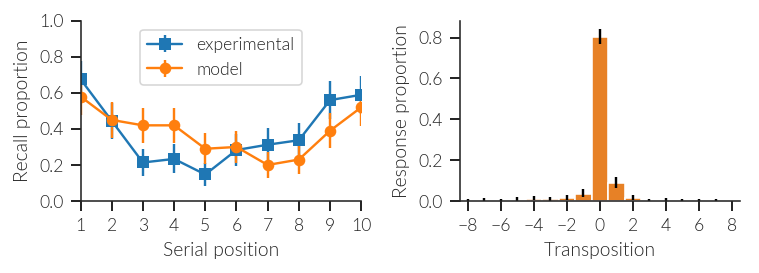

In [18]:
fig = plt.figure(figsize=(textwidth, 0.9 * row_height))
ax = fig.add_subplot(1, 2, 1)
ev.evaluate_serial_pos_curve(proto, exp_data, model_data, ax=ax)
ax.legend(loc='upper center')
ev.evaluate_transpositions(proto, exp_data, model_data, ax=fig.add_subplot(1, 2, 2))
sns.despine(fig)
fig.tight_layout()

In [8]:
save_tight_fig(fig, '../../../phd-thesis/figures/results/serial.pdf')

## Free recall

In [22]:
immediate = (
    PROTOCOLS['immediate'],
    read_exp_data(PROTOCOLS['immediate'].exp_data),
    DataRep('psyrun', store.load('../../data/final-new/immediate.npz')))
delayed = (
    PROTOCOLS['delayed'],
    read_exp_data(PROTOCOLS['delayed'].exp_data),
    DataRep('psyrun', store.load('../../data/final-new/delayed.npz')))
contdist = (
    PROTOCOLS['contdist'],
    read_exp_data(PROTOCOLS['contdist'].exp_data),
    DataRep('psyrun', store.load('../../data/final-new/contdist.npz')))

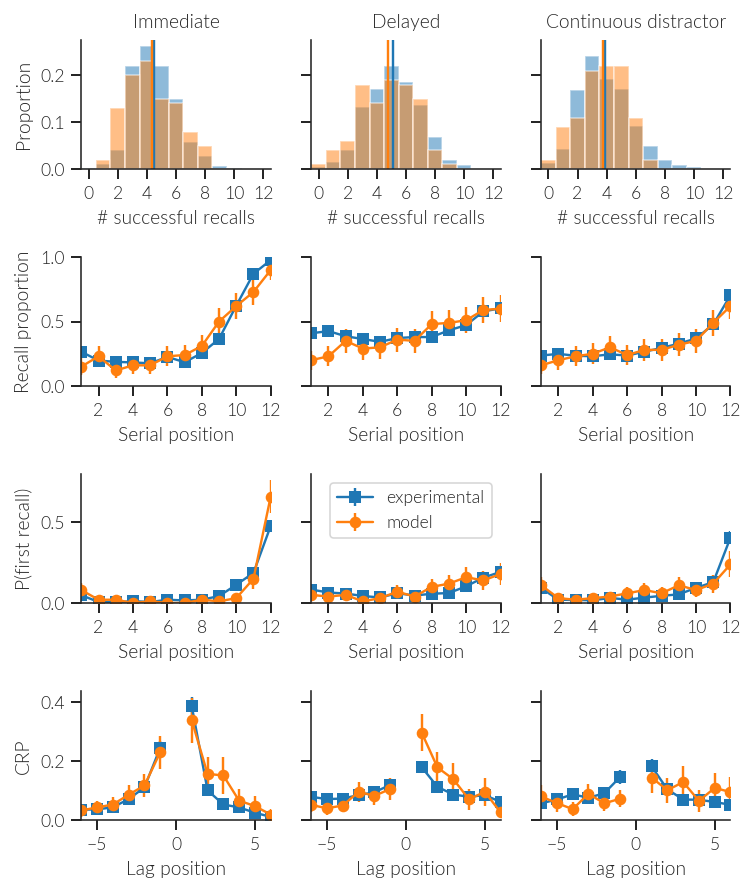

In [7]:
fig = plt.figure(figsize=(textwidth, 2.8 * row_height))

ax = fig.add_subplot(4, 3, 1)
ax.set_title("Immediate")
ev.evaluate_successful_recalls(*immediate, ax=ax)
ax.legend().remove()

ax = fig.add_subplot(4, 3, 2, sharey=ax)
ax.set_title("Delayed")
ev.evaluate_successful_recalls(*delayed, ax=ax)
ax.legend().remove()

ax = fig.add_subplot(4, 3, 3, sharey=ax)
ax.set_title("Continual distractor")
ev.evaluate_successful_recalls(*contdist, ax=ax)
ax.legend().remove()


ax = fig.add_subplot(4, 3, 4)
ev.evaluate_serial_pos_curve(*immediate, ax=ax, strict=False)
ax.legend().remove()

ax = fig.add_subplot(4, 3, 5, sharey=ax)
ev.evaluate_serial_pos_curve(*delayed, ax=ax, strict=False)
ax.legend().remove()

ax = fig.add_subplot(4, 3, 6, sharey=ax)
ev.evaluate_serial_pos_curve(*contdist, ax=ax, strict=False)
ax.legend().remove()


ax = fig.add_subplot(4, 3, 7)
ev.evaluate_p_first_recall(*immediate, ax=ax)
ax.legend().remove()

ax = fig.add_subplot(4, 3, 8, sharey=ax)
ev.evaluate_p_first_recall(*delayed, ax=ax)

ax = fig.add_subplot(4, 3, 9, sharey=ax)
ev.evaluate_p_first_recall(*contdist, ax=ax)
ax.legend().remove()


ax = fig.add_subplot(4, 3, 10)
ev.evaluate_crp(*immediate, ax=ax)
ax.legend().remove()

ax = fig.add_subplot(4, 3, 11, sharey=ax)
ev.evaluate_crp(*delayed, ax=ax)
ax.legend().remove()

ax = fig.add_subplot(4, 3, 12, sharey=ax)
ev.evaluate_crp(*contdist, ax=ax)
ax.legend().remove()

sns.despine(fig)
fig.tight_layout()

In [11]:
from cue.analysis import analysis

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/numeric.p

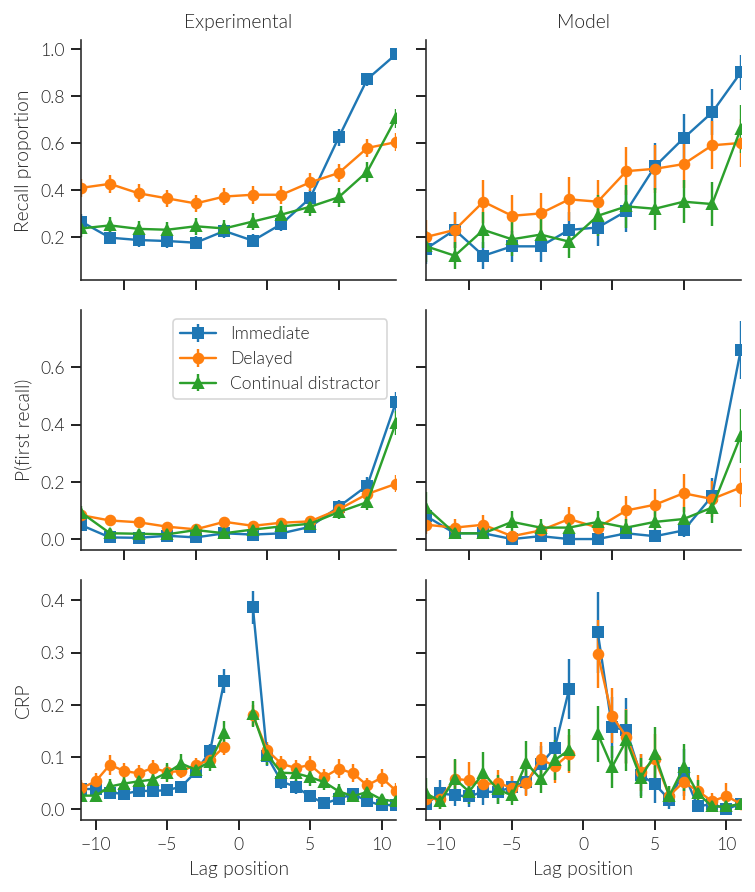

In [23]:
fig = plt.figure(figsize=(textwidth, 2.8 * row_height))

datasets = (immediate, delayed, contdist)
markers = ('s', 'o', '^')

ax = fig.add_subplot(3, 2, 1)
ax.set_title("Experimental")
for data, marker in zip(datasets, markers):
    proto, exp_data, model_data = data
    ev_exp_data = analysis.serial_pos_curve(exp_data, strict=False)
    ev_exp_data['correct'].plot(
        marker=marker, ax=ax,
        yerr=ev_exp_data[['ci_low', 'ci_upp']].values.T)
ax.set_xlabel("Serial position")
ax.set_ylabel("Recall proportion")
ax.legend().remove()

ax = fig.add_subplot(3, 2, 2,  sharex=ax, sharey=ax)
ax.set_title("Model")
for data, marker in zip(datasets, markers):
    proto, exp_data, model_data = data
    ev_exp_data = analysis.serial_pos_curve(model_data, strict=False)
    ev_exp_data['correct'].plot(
        marker=marker, ax=ax,
        yerr=ev_exp_data[['ci_low', 'ci_upp']].values.T)
ax.set_xlabel("Serial position")
ax.legend().remove()

ax = fig.add_subplot(3, 2, 3)
for data, marker, label, in zip(datasets, markers, ("Immediate", "Delayed", "Continual distractor")):
    proto, exp_data, model_data = data
    ev_exp_data = analysis.p_first_recall(exp_data)
    ev_exp_data['p_first'].plot(
        marker=marker, label=label, ax=ax,
        yerr=ev_exp_data[['ci_low', 'ci_upp']].values.T)
ax.set_xlabel("Serial position")
ax.set_ylabel("P(first recall)")
ax.legend(loc='best')

ax = fig.add_subplot(3, 2, 4, sharex=ax, sharey=ax)
for data, marker in zip(datasets, markers):
    proto, exp_data, model_data = data
    ev_exp_data = analysis.p_first_recall(model_data)
    ev_exp_data['p_first'].plot(
        marker=marker, ax=ax,
        yerr=ev_exp_data[['ci_low', 'ci_upp']].values.T)
ax.set_xlabel("Serial position")
ax.legend().remove()

ax = fig.add_subplot(3, 2, 5)
for data, marker in zip(datasets, markers):
    proto, exp_data, model_data = data
    ev_exp_data = analysis.crp(exp_data)
    ev_exp_data['crp'].plot(
        marker=marker, ax=ax,
        yerr=np.copy(ev_exp_data[['ci_low', 'ci_upp']].values.T))
ax.set_xlabel("Lag position")
ax.set_ylabel("CRP")
ax.legend().remove()

ax = fig.add_subplot(3, 2, 6, sharex=ax, sharey=ax)
for data, marker in zip(datasets, markers):
    proto, exp_data, model_data = data
    ev_exp_data = analysis.crp(model_data)
    ev_exp_data['crp'].plot(
        marker=marker, ax=ax,
        yerr=np.copy(ev_exp_data[['ci_low', 'ci_upp']].values.T))
ax.set_xlabel("Lag position")
ax.legend().remove()

sns.despine(fig)
fig.tight_layout()

In [24]:
save_tight_fig(fig, './free-recall-alternate.pdf')

## No STM/LTM

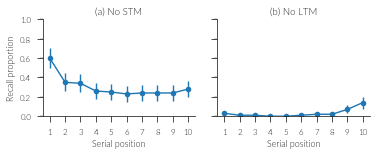

In [12]:
proto = PROTOCOLS['serial']
no_stm = DataRep('psyrun', store.load('../../data/final/no_stm/result.npz'))
no_ltm = DataRep('psyrun', store.load('../../data/final/no_ltm/result.npz'))

fig = plt.figure(figsize=(textwidth, row_height))

ax1 = fig.add_subplot(1, 2, 1)
ev.evaluate_serial_pos_curve(proto, None, no_stm, ax=ax1)
ax1.legend().remove()
ax1.set_title("(a) No STM")

ax2 = fig.add_subplot(1, 2, 2, sharex=ax1, sharey=ax1)
ev.evaluate_serial_pos_curve(proto, None, no_ltm, ax=ax2)
ax2.legend().remove()
ax2.set_title("(b) No LTM")

sns.despine(fig)
fig.tight_layout()

In [13]:
save_tight_fig(fig, "../../../phd-thesis/figures/results/no_xtm.pdf")

## Scopolamine

In [14]:
scopolamine = (
    PROTOCOLS['scopolamine'],
    None,
    DataRep('psyrun', store.load('../../data/final/scopolamine/result.npz')))
no_scopolamine = (
    PROTOCOLS['scopolamine'],
    None,
    DataRep('psyrun', store.load('../../data/final/no_scopolamine/result.npz')))

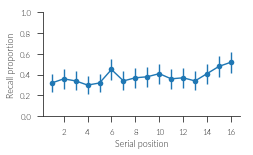

In [15]:
fig = plt.figure(figsize=single_fig_size)
ax = fig.add_subplot(1, 1, 1)
ev.evaluate_serial_pos_curve(*scopolamine, strict=False, ax=ax)
ax.legend().remove()
sns.despine(fig)
fig.tight_layout()

In [16]:
save_tight_fig(fig, '../../../phd-thesis/figures/results/scopolamine-serial.pdf')

In [17]:
from scipy.stats import sem

In [18]:
x = ev.convert(scopolamine[-1], 'success_count').data / 16. * 100.
print(np.mean(x), sem(x))

37.9375 0.9902260671894142


In [19]:
x = ev.convert(no_scopolamine[-1], 'success_count').data / 16. * 100.
print(np.mean(x), sem(x))

74.0625 1.078423460005813
